<a href="https://colab.research.google.com/github/khushi0111/LNB_DS_Internship/blob/main/Model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DS404 Khushi Agarwal

BREAST CANCER DATASET (Breast Cancer Prediction)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url="https://drive.google.com/file/d/1F6E8y4nl4v61Hka1jMmgptgCN17z6iLy/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [6]:
df.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [7]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
df.describe()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


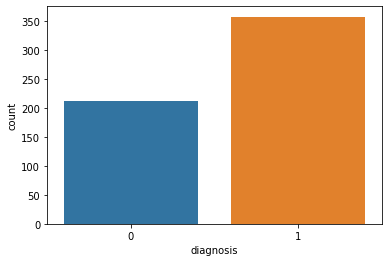

In [9]:
sns.countplot(df['diagnosis']);

In [10]:
plt.figure(figsize=(20,8))

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

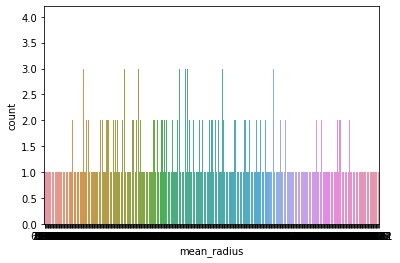

In [11]:
sns.countplot(df["mean_radius"])

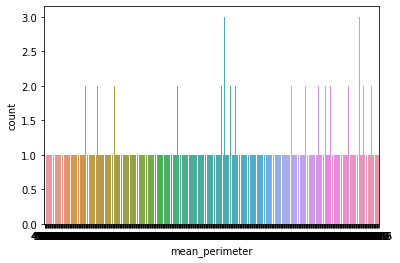

In [12]:
sns.countplot(df["mean_perimeter"])

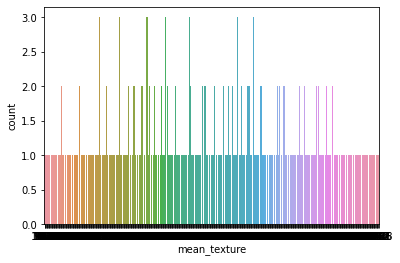

In [13]:
sns.countplot(df["mean_texture"])

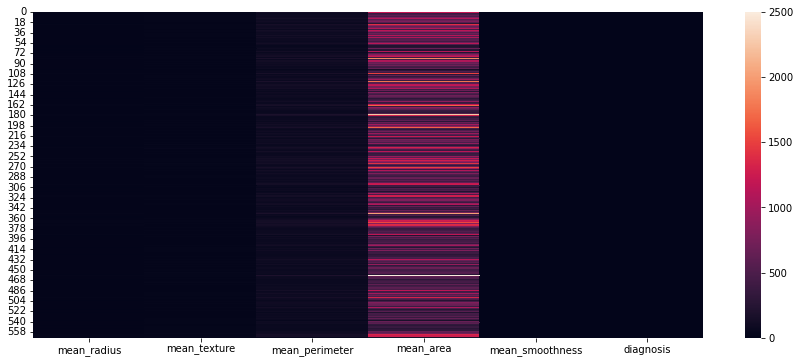

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(df)

In [15]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


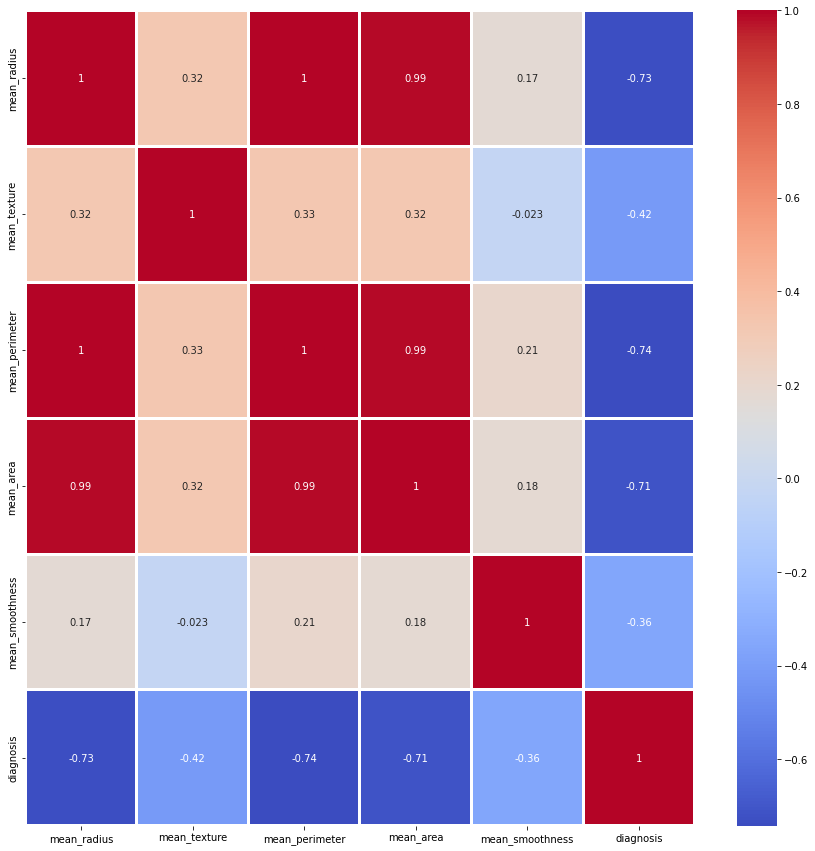

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=2)

In [18]:
data=df.drop(["diagnosis"],axis=1)
print("The shape of f{data} is: ",data.shape)

The shape of f{data} is:  (569, 5)


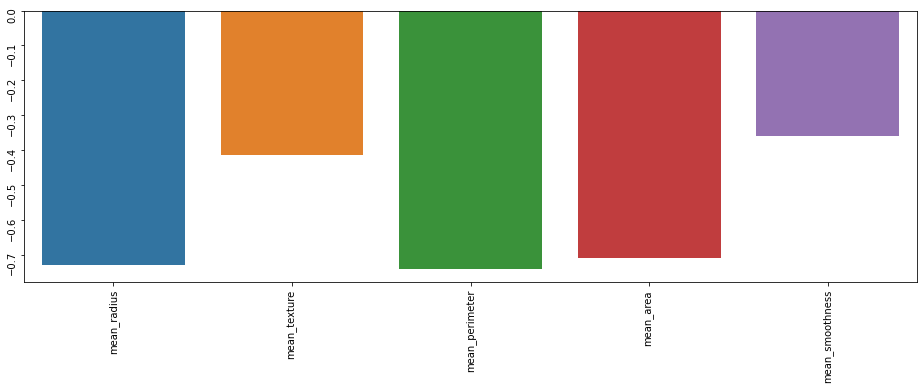

In [19]:
plt.figure(figsize=(16,5))
ax=sns.barplot(data.corrwith(df.diagnosis).index,data.corrwith(df.diagnosis))
ax.tick_params(labelrotation=90)

In [20]:
data.corrwith(df.diagnosis).index

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [21]:
x=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [23]:
x_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
28,15.300,25.27,102.40,732.4,0.10820
163,12.340,22.22,79.85,464.5,0.10120
123,14.500,10.89,94.28,640.7,0.11010
361,13.300,21.57,85.24,546.1,0.08582
549,10.820,24.21,68.89,361.6,0.08192
...,...,...,...,...,...
447,14.800,17.66,95.88,674.8,0.09179
98,11.600,12.84,74.34,412.6,0.08983
448,14.530,19.34,94.25,659.7,0.08388
381,11.040,14.93,70.67,372.7,0.07987


In [24]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [25]:
x_test_sc

array([[ 3.45321408e-01,  1.46339385e+00,  4.48815430e-01,
         2.42940781e-01,  8.33644906e-01],
       [-5.24643017e-01,  7.38714477e-01, -5.13174621e-01,
        -5.64472944e-01,  3.33652503e-01],
       [ 1.10195888e-01, -1.95329120e+00,  1.02413691e-01,
        -3.34303973e-02,  9.69357129e-01],
       [-2.42492393e-01,  5.84274611e-01, -2.83235536e-01,
        -3.18541776e-01, -7.64902232e-01],
       [-9.71381506e-01,  1.21153807e+00, -9.80731648e-01,
        -8.74599381e-01, -1.04346943e+00],
       [ 2.75829706e+00,  1.22579406e+00,  2.69701391e+00,
         3.30080553e+00,  7.40789174e-01],
       [-6.42205778e-01,  3.91818777e-01, -5.97642040e-01,
        -6.35298710e-01, -7.48473910e-01],
       [-8.77331298e-01, -1.19772385e+00, -8.80479913e-01,
        -8.05280546e-01, -1.69917375e+00],
       [ 1.66038199e-01, -1.21910783e+00,  2.70495323e-01,
         1.29830829e-02,  4.69364727e-01],
       [-2.21918910e-01, -6.46492326e-01, -2.46547667e-01,
        -2.96239195e-01

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
prediction_rf=forest.predict(x_test)
prediction_rf

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [28]:
accuracy_score(prediction_rf,y_test)

0.9298245614035088

Saving Trained Model

In [29]:
# saving model
import pickle

with open("model4","wb") as f:
    pickle.dump(forest,f)

In [30]:
# loading saved model
with open("model4","rb") as f:
    m4=pickle.load(f)

In [31]:
m4.predict(x_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])